<a href="https://colab.research.google.com/github/youkyung2/dataAnalysis/blob/master/KBO_%ED%83%80%EC%9E%90_OPS_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# DataSet : https://dacon.io/competitions/official/235546/
# https://raw.githubusercontent.com/youkyung2/dataAnalysis/master/Pred_Koreabaseball/Regular_Season_Batter.csv
# https://raw.githubusercontent.com/youkyung2/dataAnalysis/master/Pred_Koreabaseball/Pre_Season_Batter.csv
# https://raw.githubusercontent.com/youkyung2/dataAnalysis/master/Pred_Koreabaseball/Regular_Season_Batter_Day_by_Day_b4.csv
# https://raw.githubusercontent.com/youkyung2/dataAnalysis/master/Pred_Koreabaseball/submission.csv
# [Files]
#① Regular_Season_Batter.csv : KBO에서 활약한 타자들의 역대 정규시즌 성적을 포함하여 몸무게, 키 ,생년월일 등의 기본정보
#② Regular_Season_Batter_Day_by_Day.csv: KBO에서 활약한 타자들의 일자 별 정규시즌 성적
#③ Pre_Season_Batter.csv : KBO에서 활약한 타자들의 역대 시범경기(정규시즌 직전에 여는 연습경기) 성적
#④ submission.csv : 참가자들이 예측해야 할 타자의 이름과 아이디 목록

In [29]:
# 한글 설정
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (10.1 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

In [31]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

In [2]:
# 시각화 설정
from matplotlib import font_manager, rc
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import platform

# 그래프 마이너스기호 표시되게 하는 설정
matplotlib.rcParams['axes.unicode_minus'] = False

In [4]:
# 프리시즌 데이터 로드
preseason_df = pd.read_csv('https://raw.githubusercontent.com/youkyung2/dataAnalysis/master/Pred_Koreabaseball/Pre_Season_Batter.csv')
# 정규시즌 데이터 로드
regular_season_df = pd.read_csv('https://raw.githubusercontent.com/youkyung2/dataAnalysis/master/Pred_Koreabaseball/Regular_Season_Batter.csv')
# 데이터 크기 확인
print(preseason_df.shape)
# 데이터 상단 출력
print(preseason_df.head())

(1393, 29)
   batter_id batter_name  ...  starting_salary    OPS
0          0        가르시아  ...              NaN  0.959
1          1         강경학  ...          10000만원  0.500
2          1         강경학  ...          10000만원    NaN
3          1         강경학  ...          10000만원  0.416
4          1         강경학  ...          10000만원  0.493

[5 rows x 29 columns]


In [3]:
preseason_df.head(2)

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,3B,HR,TB,RBI,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
0,0,가르시아,2018,LG,0.350,7,20,1,7,1,0,1,11,5,0,0,2,0,3,1,0.55,0.409,1,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.959
1,1,강경학,2011,한화,0.000,4,2,2,0,0,0,0,0,1,0,1,0,2,1,0,0.00,0.500,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.500


In [4]:
# 데이터 기초통계량 확인
display(preseason_df.describe())

,batter_id,year,G,AB,R,H,2B,3B,HR,TB,RBI,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,OPS
count,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1364.000000,1368.000000,1393.000000,1364.000000
mean,173.434314,2013.014358,8.705671,19.201723,2.679828,5.021536,0.954774,0.119885,0.391960,7.391960,2.430725,0.629576,0.291457,1.877961,0.330223,3.714286,0.447236,0.361012,0.317912,0.381910,0.676924
std,94.716851,4.166757,5.562686,13.395946,2.637212,4.232584,1.196904,0.379976,0.748557,6.538787,2.698122,1.146854,0.595522,2.053392,0.642204,3.180884,0.723364,0.269892,0.151489,0.729521,0.386933
min,0.000000,2002.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,99.000000,2010.000000,6.000000,9.000000,1.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.217000,0.250000,0.000000,0.472000
50%,178.000000,2014.000000,9.000000,18.000000,2.000000,4.000000,1.000000,0.000000,0.000000,6.000000,2.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.344500,0.333000,0.000000,0.675000
75%,254.000000,2017.000000,11.000000,28.000000,4.000000,8.000000,2.000000,0.000000,1.000000,11.000000,4.000000,1.000000,0.000000,3.000000,1.000000,5.000000,1.000000,0.478000,0.400000,1.000000,0.867000
max,344.000000,2018.000000,119.000000,183.000000,35.000000,51.000000,11.000000,4.000000,5.000000,68.000000,24.000000,9.000000,4.000000,21.000000,4.000000,36.000000,5.000000,4.000000,1.000000,5.000000,5.000000


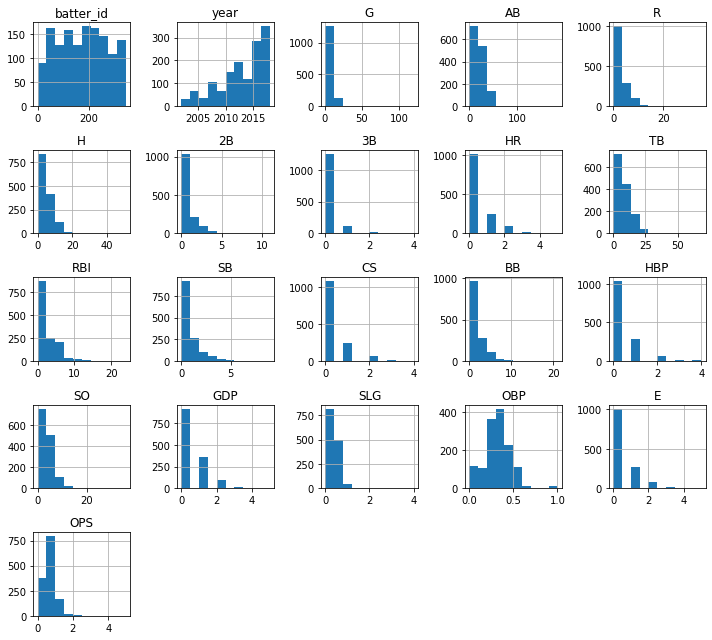

In [5]:
# 데이터시각화
preseason_df.hist(figsize=(10,9))
plt.tight_layout() #그래프 간격 설정
plt.show() # 과거 데이터일 수록 기록한 데이터 수가 적다

In [6]:
# 정규시즌 데이터에서 2002년 이후의 연도별 기록된 선수의 수
regular_count = regular_season_df.groupby('year')['batter_id'].count().rename('regular')

# 프리시즌 데이터에서 연도별 기록된 선수의 수
preseason_count = preseason_df.groupby('year')['batter_id'].count().rename('preseason')

In [7]:
regular_season_df.head(3)

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,3B,HR,TB,RBI,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
0,0,가르시아,2018,LG,0.339,50,183,27,62,9,0,8,95,34,5,0,9,8,25,3,0.519,0.383,9,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.902
1,1,강경학,2011,한화,0.000,2,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0.000,0.000,1,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.000
2,1,강경학,2014,한화,0.221,41,86,11,19,2,3,1,30,7,0,0,13,2,28,1,0.349,0.337,6,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.686


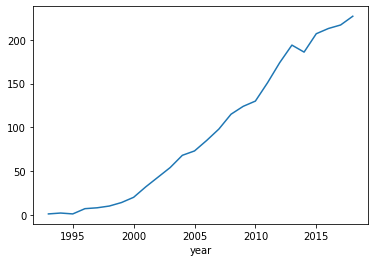

In [23]:
regular_count.plot()

In [22]:
regular_count.loc[2002:]

year
2002     43
2003     54
2004     68
2005     73
2006     85
2007     98
2008    115
2009    124
2010    130
2011    151
2012    174
2013    194
2014    186
2015    207
2016    213
2017    217
2018    227
Name: regular, dtype: int64

In [17]:
print(regular_count.head())
print(preseason_count.head())

year
1993    1
1994    2
1995    1
1996    7
1997    8
Name: regular, dtype: int64
year
2002    12
2003    19
2004    28
2005    37
2006    36
Name: preseason, dtype: int64


In [25]:
np.round(preseason_count/regular_count,2).rename('ratio')

year
1993     NaN
1994     NaN
1995     NaN
1996     NaN
1997     NaN
1998     NaN
1999     NaN
2000     NaN
2001     NaN
2002    0.28
2003    0.35
2004    0.41
2005    0.51
2006    0.42
2007    0.44
2008    0.53
2009    0.53
2010    0.55
2011    0.50
2012    0.50
2013    0.54
2014    0.63
2015    0.65
2016    0.72
2017    0.77
2018    0.80
Name: ratio, dtype: float64

In [28]:
pd.concat([regular_count, preseason_count, np.round(preseason_count/regular_count,2).rename('ratio')], axis =1).loc[2002:]

,regular,preseason,ratio
year,,,
2002,43,12.0,0.28
2003,54,19.0,0.35
2004,68,28.0,0.41
2005,73,37.0,0.51
2006,85,36.0,0.42
2007,98,43.0,0.44
2008,115,61.0,0.53
2009,124,66.0,0.53
2010,130,72.0,0.55


In [8]:
pd.concat([regular_count, preseason_count, np.round(preseason_count/regular_count,2).rename('ratio')], axis =1).transpose().loc[:,2002:] # 2002년부터 봄
# 해석 : 과거로 갈 수록 프리시즌의 기록이 정규시즌보다 적어짐

year,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
regular,43.00,54.00,68.00,73.00,85.00,98.00,115.00,124.00,130.00,151.0,174.0,194.00,186.00,207.00,213.00,217.00,227.0
preseason,12.00,19.00,28.00,37.00,36.00,43.00,61.00,66.00,72.00,75.0,87.0,104.00,117.00,134.00,153.00,167.00,182.0
ratio,0.28,0.35,0.41,0.51,0.42,0.44,0.53,0.53,0.55,0.5,0.5,0.54,0.63,0.65,0.72,0.77,0.8


In [13]:
# 프리시즌의 성적과 정규시즌의 성적 간의 상관관계 구하기
regular_season_df['new_idx'] = regular_season_df['batter_name'] + regular_season_df['year'].apply(str)
preseason_df['new_idx'] = preseason_df['batter_name'] + preseason_df['year'].apply(str)

print(regular_season_df['new_idx'].head(3))
print(preseason_df['new_idx'].head(3))

0    가르시아2018
1     강경학2011
2     강경학2014
Name: new_idx, dtype: object
0    가르시아2018
1     강경학2011
2     강경학2014
Name: new_idx, dtype: object


In [14]:
# 새로운 인덱스의 교집합 (두 데이터의 성적을 비교하기위해 두 데이터에 공통으로 존재하는 선수들의 기록만 사용하기로 함)
intersection_idx = list(set(regular_season_df['new_idx']).intersection(preseason_df['new_idx']))

print(intersection_idx)

['윤석민2017', '스크럭스2018', '이명기2018', '채태인2018', '이지영2017', '정의윤2005', '임병욱2017', '김재율2012', '김성욱2015', '손시헌2005', '강구성2013', '정상호2003', '정범모2012', '조동찬2012', '최진행2015', '박헌도2013', '이성열2011', '송광민2017', '유재신2008', '최정2011', '이성우2010', '배영섭2012', '백창수2010', '박기혁2007', '이종욱2008', '이진영2014', '손주인2013', '안치홍2009', '정수빈2015', '나지완2013', '김용의2016', '박해민2016', '박기혁2003', '장성우2009', '박한이2008', '정훈2016', '박병호2009', '손시헌2018', '이영욱2016', '송민섭2018', '정근우2005', '김상수2018', '김성현2012', '민병헌2015', '양석환2015', '이대호2009', '이지영2013', '정성훈2009', '손아섭2016', '정성훈2005', '오지환2011', '정성훈2002', '송민섭2015', '김주형2006', '김주형2016', '최준석2009', '오재일2010', '김문호2016', '조동찬2016', '이용규2013', '조동화2013', '조동찬2018', '박해민2017', '이준호2012', '하주석2012', '양성우2012', '이상호2014', '장성우2014', '정수빈2014', '손시헌2012', '박지규2015', '나주환2018', '나성범2018', '오재일2013', '정훈2017', '장승현2018', '이택근2014', '안치홍2018', '조수행2016', '허도환2016', '나지완2014', '이재원2010', '박준태2015', '이범호2015', '김재성2015', '강한울2017', '유재신2009', '박용택2002', '박민우2013', '박동원2018', '박세혁2016', 

In [39]:
# 교집합에 존재하는 데이터만 불러오기
regular_season_new = regular_season_df.loc[regular_season_df['new_idx'].apply(lambda x: x in intersection_idx)].copy()

In [15]:
regular_season_df['new_idx'].apply(lambda x: x in intersection_idx)

0        True
1        True
2        True
3        True
4        True
        ...  
2449     True
2450    False
2451    False
2452    False
2453    False
Name: new_idx, Length: 2454, dtype: bool

In [17]:
regular_season_df['new_idx'][:10]

0    가르시아2018
1     강경학2011
2     강경학2014
3     강경학2015
4     강경학2016
5     강경학2017
6     강경학2018
7     강구성2013
8     강구성2015
9     강구성2016
Name: new_idx, dtype: object

In [26]:
regular_season_df.loc[regular_season_df['new_idx'] == '윤석민2017', 'new_idx']
# df.loc[df['hour'] <= 5, 'hour':'weight']

1364    윤석민2017
Name: new_idx, dtype: object

In [ ]:
# regular_season_df[regular_season_df['new_idx'] == '윤석민2017', 'new_idx']

In [30]:
regular_season_df.iloc[1364]['new_idx']

'윤석민2017'

In [33]:
regular_season_df.iloc[2452]['new_idx']

'황진수2017'

In [36]:
'황진수2017' in intersection_idx

False

In [37]:
'윤석민2017' in intersection_idx

True

In [32]:
test = regular_season_df['new_idx'].apply(lambda x: x in intersection_idx)
print(test.iloc[1364])
print(test.iloc[2452])

True
False


In [40]:
regular_season_new = regular_season_new.sort_values(by='new_idx').reset_index(drop=True)

In [42]:
# 비교를 위해 인덱스로 정렬
preseason_new = preseason_df.loc[preseason_df['new_idx'].apply(lambda x: x in intersection_idx)].copy()
preseason_new = preseason_new.sort_values(by='new_idx').reset_index(drop=True)

In [43]:
# 검정 코드
print(regular_season_new.shape, regular_season_new.shape)
sum(regular_season_new['new_idx'] == regular_season_new['new_idx'])

(1358, 30) (1358, 30)


1358

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


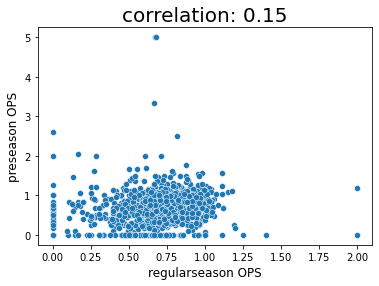

In [45]:
# 정규시즌과 프리시즌의 상관관계 계산
correlation = regular_season_new['OPS'].corr(preseason_new['OPS'])
sns.scatterplot(regular_season_new['OPS'], preseason_new['OPS'])
plt.title('correlation: ' + str(np.round(correlation,2)), fontsize=20)
plt.xlabel('regularseason OPS', fontsize=12)
plt.ylabel('preseason OPS', fontsize=12)
plt.show()

In [ ]:
# 상관관계 해석 :
# 정규시즌과 프리시즌의 성적 분포는 선형적인 모습이 아니다. => 상관성이 매우 낮다.

# EDA 를 통해 알아낸 사실
# 1. 프리시즌 데이터의 경기 기록 수는 매우 적으므로, 그 구성 역시 정규시즌 데이터와는 차이가 있을 수 있다.
# 2. 프리시즌 데이터와 정규시즌 데이터 간 상관관계는 매우 낮다.
# => 실제 분석에서는 프리시즌 데이터를 분석에서 제외할 것이다.

In [3]:
# 정규시즌 데이터분석
regular_season_df = pd.read_csv('https://raw.githubusercontent.com/youkyung2/dataAnalysis/master/Pred_Koreabaseball/Regular_Season_Batter.csv')
display(regular_season_df.shape, regular_season_df.head(), regular_season_df.describe())
# 정규시즌 데이터가 프리시즌 데이터보다 크다

(2454, 29)

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,3B,HR,TB,RBI,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
0,0,가르시아,2018,LG,0.339,50,183,27,62,9,0,8,95,34,5,0,9,8,25,3,0.519,0.383,9,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.902
1,1,강경학,2011,한화,0.000,2,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0.000,0.000,1,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.000
2,1,강경학,2014,한화,0.221,41,86,11,19,2,3,1,30,7,0,0,13,2,28,1,0.349,0.337,6,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.686
3,1,강경학,2015,한화,0.257,120,311,50,80,7,4,2,101,27,4,3,40,5,58,3,0.325,0.348,15,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.673
4,1,강경학,2016,한화,0.158,46,101,16,16,3,2,1,26,7,0,0,8,2,30,5,0.257,0.232,7,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.489


,batter_id,year,avg,G,AB,R,H,2B,3B,HR,TB,RBI,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,OPS
count,2454.000000,2454.000000,2428.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2428.000000,2430.000000,2454.000000,2428.000000
mean,178.079462,2011.614507,0.237559,72.535045,201.514670,29.912388,55.988183,9.863488,0.957620,5.504075,84.279136,27.788509,5.290139,2.335778,20.943765,3.424613,38.596985,4.603504,0.343826,0.306684,3.676447,0.649939
std,97.557947,4.992833,0.098440,45.093871,169.537029,28.778759,52.253844,9.871314,1.647193,7.989380,82.854200,29.602966,9.088580,3.194045,21.206113,4.132614,31.801466,4.713531,0.163335,0.111778,4.585248,0.261634
min,0.000000,1993.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,101.250000,2008.000000,0.203000,28.000000,38.250000,5.000000,8.000000,1.000000,0.000000,0.000000,10.000000,3.000000,0.000000,0.000000,3.000000,0.000000,10.000000,1.000000,0.267454,0.272727,0.000000,0.546000
50%,183.000000,2013.000000,0.255000,79.000000,163.000000,21.000000,40.000000,7.000000,0.000000,2.000000,56.000000,17.000000,2.000000,1.000000,14.000000,2.000000,33.000000,3.000000,0.360124,0.328592,2.000000,0.688637
75%,265.000000,2016.000000,0.291000,115.000000,357.500000,49.000000,100.000000,16.000000,1.000000,8.000000,146.000000,44.000000,6.000000,3.000000,34.000000,5.000000,60.000000,7.000000,0.436000,0.367000,5.000000,0.797234
max,344.000000,2018.000000,1.000000,144.000000,600.000000,135.000000,201.000000,47.000000,17.000000,53.000000,377.000000,146.000000,84.000000,21.000000,108.000000,27.000000,161.000000,24.000000,3.000000,1.000000,30.000000,4.000000


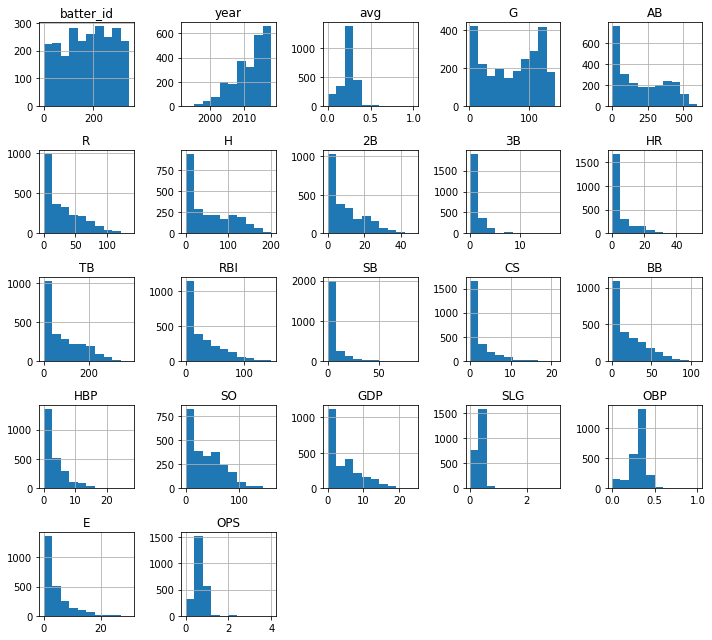

In [4]:
# 히스토그램 시각화
regular_season_df.hist(figsize=(10,9))
plt.tight_layout()
plt.show()

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/bac

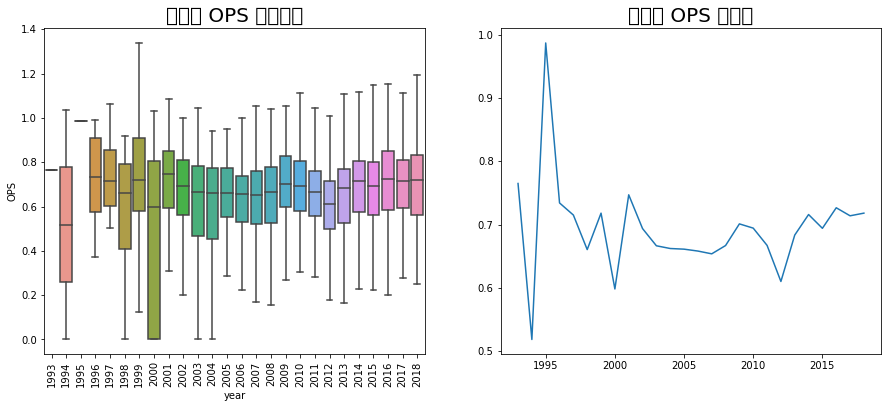

In [32]:
# OPS 시각화
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
g = sns.boxplot(x="year", y="OPS", data=regular_season_df, showfliers=False)
g.set_title('연도별 OPS 상자그림', size=20)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.subplot(1,2,2)
plt.plot(regular_season_df.groupby('year')['OPS'].median())
plt.title('연도별 OPS 중앙값', size = 20)
plt.show()

In [6]:
# 2000년도 이전의 기록은 변동이 매우 크다. 그 이후로는 상대적으로 변동폭이 크지 않은 추세
# 연도별 OPS
pd.crosstab(regular_season_df['year'],'count').T
# 2000년도 이전에는 기록의 수가 매우 적다. 따라서 2000년도 이전 OPS 변동 폭이 컸던 거라 예상할 수 있다.

year,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
col_0,,,,,,,,,,,,,,,,,,,,,,,,,,
count,1,2,1,7,8,10,14,20,32,43,54,68,73,85,98,115,124,130,151,174,194,186,207,213,217,227


In [ ]:
pd.crosstab(regular_season_df['year'],'count')

In [26]:
regular_season_df.groupby('year')['batter_id'].count().T

year
1993      1
1994      2
1995      1
1996      7
1997      8
1998     10
1999     14
2000     20
2001     32
2002     43
2003     54
2004     68
2005     73
2006     85
2007     98
2008    115
2009    124
2010    130
2011    151
2012    174
2013    194
2014    186
2015    207
2016    213
2017    217
2018    227
Name: batter_id, dtype: int64

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54016 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51201 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46160 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49328 missing from current font.
  font.set_

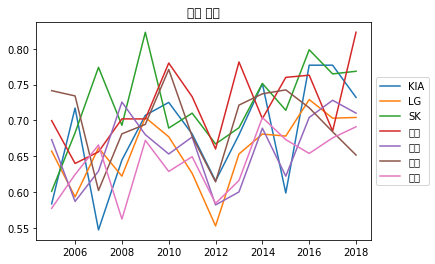

In [20]:
# 팀별 및 연도별 OPS 값

# 연도별 팀의 OPS 중앙값 계산
med_OPS_team = regular_season_df.pivot_table(index=['team'], columns='year', values='OPS', aggfunc='median')
# 2005년 이후에 결측치가 존재하지 않는 팀만 확인
team_idx = med_OPS_team.loc[:,2005:].isna().sum(axis=1) <= 0

plt.plot(med_OPS_team.loc[team_idx,2005:].T)
plt.legend(med_OPS_team.loc[team_idx, 2005:].T.columns,
           loc = 'center left', bbox_to_anchor=(1,0.5)) # 그래프 범례를 그래프 밖에 위치
plt.title('팀별 성적')
plt.show()

In [28]:
# 키와 몸무게 변수가 성적과 연관성이 있는지 확인

import re

regular_season_df['weight'] = regular_season_df['height/weight'].apply(
    lambda x : int(re.findall('\d+', x.split('/')[1])[0]) if pd.notnull(x) else x)

regular_season_df['height'] = regular_season_df['height/weight'].apply(
    lambda x : int(re.findall('\d+', x.split('/')[0])[0]) if pd.notnull(x) else x)

print(regular_season_df['height/weight'][0], regular_season_df['height'][0],
      regular_season_df['weight'][0])

177cm/93kg 177.0 93.0


In [6]:
regular_season_df.head(1)

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,3B,HR,TB,RBI,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
0,0,가르시아,2018,LG,0.339,50,183,27,62,9,0,8,95,34,5,0,9,8,25,3,0.519,0.383,9,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.902


In [14]:
int(regular_season_df['height/weight'][0].split('/')[0].replace('cm',''))

177

In [59]:
regular_season_df['height'] = regular_season_df['height/weight'].apply(
    lambda x : func1(x) if pd.notnull(x) else x)

In [53]:
regular_season_df['height'].isnull().sum()

802

In [22]:
def func1 (x) :
  x = int(x.split('/')[0].replace('cm',''))
  return x

In [40]:
func1('177cm/81kg')
print(type('177cm/81kg'))

<class 'str'>


In [43]:
regular_season_df['height'] = regular_season_df['height/weight'].apply(func1)

AttributeError: ignored

In [34]:
type(regular_season_df['height/weight'][0])

str

In [33]:
regular_season_df['height/weight'][0].split('/')

['177cm', '93kg']

In [45]:
regular_season_df['height/weight'].isnull

<bound method Series.isnull of 0       177cm/93kg
1       180cm/72kg
2       180cm/72kg
3       180cm/72kg
4       180cm/72kg
           ...    
2449    181cm/82kg
2450    181cm/82kg
2451    181cm/82kg
2452    181cm/82kg
2453    181cm/82kg
Name: height/weight, Length: 2454, dtype: object>

In [60]:
regular_season_df['weight'] = regular_season_df['height/weight'].apply(
    lambda x : int(x.split('/')[1].replace('kg','')) if pd.notnull(x) else x)
# lambda x : [조건 일 때 식] if 조건 else [조건 아닐 때 식]

In [67]:
regular_season_df.isnull().sum()

batter_id             0
batter_name           0
year                  0
team                  0
avg                  26
G                     0
AB                    0
R                     0
H                     0
2B                    0
3B                    0
HR                    0
TB                    0
RBI                   0
SB                    0
CS                    0
BB                    0
HBP                   0
SO                    0
GDP                   0
SLG                  26
OBP                  24
E                     0
height/weight       802
year_born             0
position            802
career                0
starting_salary    1067
OPS                  26
height              802
weight              802
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


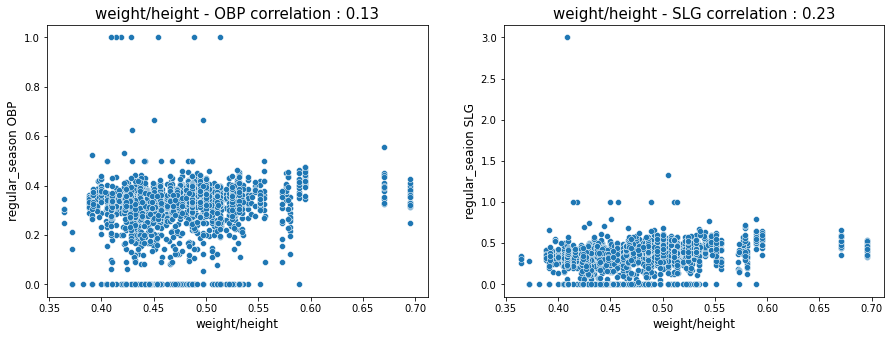

In [70]:
# 몸무게 / 키 계산
regular_season_df['weight_per_height'] = regular_season_df['weight'] / regular_season_df['height']
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)

# 정규시즌과 프리시즌의 상관관계 계산
correlation = regular_season_df['weight_per_height'].corr(regular_season_df['OBP'])
sns.scatterplot(regular_season_df['weight_per_height'], regular_season_df['OBP'])
plt.title('weight/height - OBP correlation : ' + str(np.round(correlation,2)), fontsize=15)
plt.ylabel('regular_season OBP', fontsize=12)
plt.xlabel('weight/height', fontsize=12)
plt.subplot(1,2,2)

# 정규시즌과 프리시즌의 상관관계 계산
correlation = regular_season_df['weight_per_height'].corr(regular_season_df['SLG'])
sns.scatterplot(regular_season_df['weight_per_height'], regular_season_df['SLG'])
plt.title('weight/height - SLG correlation : ' + str(np.round(correlation,2)), fontsize=15)
plt.ylabel('regular_seaion SLG', fontsize=12)
plt.xlabel('weight/height', fontsize=12)
plt.show()

# 데이터가 선형적인 모습이 아니고, 그 분포가 매우 고르다.
# => 몸무게 및 키가 장타율(OBP) 과 출루율(SLG)에 큰 영향을 끼치지 않는다.

In [71]:
regular_season_df['position'].value_counts()

내야수(우투우타)    643
외야수(우투우타)    230
외야수(좌투좌타)    201
포수(우투우타)     189
외야수(우투좌타)    184
내야수(우투좌타)    141
내야수(좌투좌타)     36
포수(우투좌타)      14
외야수(우투양타)      7
내야수(우투양타)      7
Name: position, dtype: int64

In [77]:
# 포지션 분리
regular_season_df['pos'] = regular_season_df['position'].apply(
    lambda x : x.split('(')[0] if pd.notnull(x) else x)

# 우타, 좌타, 양타
regular_season_df['hit_way'] = regular_season_df['position'].apply(
    lambda x : x[-3:-1] if pd.notnull(x) else x)

print(regular_season_df['position'][0], regular_season_df['pos'][0], regular_season_df['hit_way'][0])

내야수(우투우타) 내야수 우타


In [74]:
print(regular_season_df['position'][0].split('(')[0])
print(regular_season_df['position'][0][-3:-1])

내야수
우타


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45236 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50556 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50808 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54252 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50864 missing from current font.
  font.set_

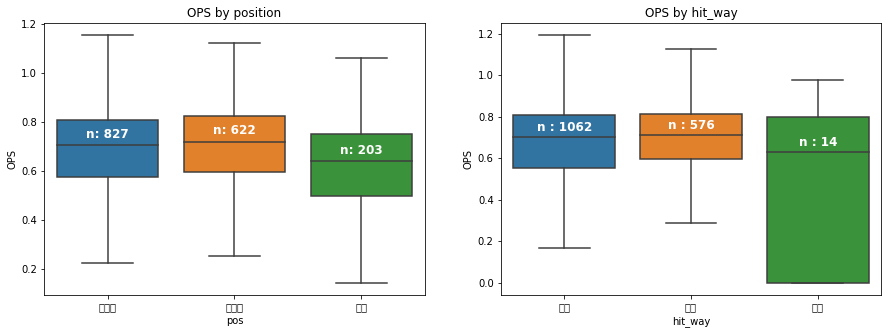

In [89]:
# 포지션별 OPS 와 타석 방향별 OPS

plt.figure(figsize=(15,5))
plt.subplot(1,2,1) # 1행 2열의 1번째 그래프
ax = sns.boxplot(x='pos', y = 'OPS', data = regular_season_df, showfliers=False)

# 포지션별 OPS 중앙값
medians = regular_season_df.groupby(['pos'])['OPS'].median().to_dict()

# 포지션별 관측치 수
nobs = regular_season_df['pos'].value_counts().to_dict()

# 키 값을 'n: 값' 형식으로 변환
for key in nobs:nobs[key] = "n: " + str(nobs[key])

# 그래프의 Xticks text 값 얻기
xticks_labels = [item.get_text() for item in ax.get_xticklabels()]

# tick 은 tick의 위치, label은 그에 해당하는 text 값
for label in ax.get_xticklabels():
  ax.text(xticks_labels.index(label.get_text()),
          medians[label.get_text()] + 0.03, nobs[label.get_text()],
          horizontalalignment = 'center', size='large', color='w', weight='semibold')

ax.set_title('OPS by position')

plt.subplot(1,2,2) # 1행 2열의 2번째 그래프
ax = sns.boxplot(x = 'hit_way', y = 'OPS', data = regular_season_df, showfliers=False)

# 타자 방향별 OPS 중앙값
medians = regular_season_df.groupby(['hit_way'])['OPS'].median().to_dict()
# 타자 방향 관측치 수
nobs = regular_season_df['hit_way'].value_counts().to_dict()
# 키 값을 'n: 값' 형식으로 변환
for key in nobs : nobs[key] = "n : " + str(nobs[key])

# 그래프의 Xticks text 값 얻기
xticks_labels = [item.get_text() for item in ax.get_xticklabels()]

# tick은 tick의 위치, label은 그에 해당하는 text 값
for label in ax.get_xticklabels() : 
  ax.text(xticks_labels.index(label.get_text()), medians[label.get_text()] + 0.03,
          nobs[label.get_text()], horizontalalignment = 'center', size='large',
          color='w', weight='semibold')

ax.set_title('OPS by hit_way')

plt.show()

In [87]:
print(nobs)
print(nobs['내야수'])

{'내야수': 'n: 827', '외야수': 'n: 622', '포수': 'n: 203'}
n: 827


In [90]:
# 외국인과 내국인 구분
regular_season_df['career'].head()
# 외국인 일 경우 국가 대학, 한국인 일 경우 초-중-고 ('-'로 이름 구분함)

0    쿠바 Ciego de Avila Maximo Gomez Baez(대)
1                         광주대성초-광주동성중-광주동성고
2                         광주대성초-광주동성중-광주동성고
3                         광주대성초-광주동성중-광주동성고
4                         광주대성초-광주동성중-광주동성고
Name: career, dtype: object

In [91]:
# '-' 을 공백 으로 대체하고, 공백을 기준으로 데이터를 나눈다
foreign_country = regular_season_df['career'].apply(
    lambda x : x.replace('-', ' ').split(' ')[0]
)

# 외국만 추출
# '초' 라고 있는 것은 한국
foreign_country_list = list(set(foreign_country.apply(
    lambda x : np.nan if '초' in x else x
)))

# 결측치 처리
foreign_country_list = [x for x in foreign_country_list if str(x) != 'nan']
foreign_country_list

['미국', '캐나다', '도미니카', '쿠바', '네덜란드']

In [92]:
# 국적 변수 추가
regular_season_df['country'] = foreign_country
regular_season_df['country'] = regular_season_df['country'].apply(
    lambda x : x if pd.isnull(x)
                 else ('foreign' if x in foreign_country_list else 'korean')
)
# foreign_country_list 안에 있는 국적이면 'foreign', 아니면 'korean'

regular_season_df[['country']].head()

,country
0,foreign
1,korean
2,korean
3,korean
4,korean


In [93]:
regular_season_df['country'].head()

0    foreign
1     korean
2     korean
3     korean
4     korean
Name: country, dtype: object

In [98]:
regular_season_df['career'][1].replace('-',' ').split(' ')[0]

'광주대성초'

In [100]:
foreign_country = regular_season_df['career'].apply(
    lambda x : x.replace('-', ' ').split(' ')[0]
)

In [101]:
foreign_country.head()

0       쿠바
1    광주대성초
2    광주대성초
3    광주대성초
4    광주대성초
Name: career, dtype: object

In [102]:
foreign_country_list = foreign_country.apply(
    lambda x : x if '초' not in x else 'Korean'
)

In [105]:
foreign_country_list = list(set(foreign_country_list))
foreign_country_list

['Korean', '미국', '캐나다', '도미니카', '쿠바', '네덜란드']

In [107]:
# 국적 변수 추가
regular_season_df['country'] = foreign_country
regular_season_df['country'] = regular_season_df['country'].apply(
    lambda x : 'foreign' if x in foreign_country_list else 'korean'
)
regular_season_df['country']

0       foreign
1        korean
2        korean
3        korean
4        korean
         ...   
2449     korean
2450     korean
2451     korean
2452     korean
2453     korean
Name: country, Length: 2454, dtype: object

In [109]:
regular_season_df['country'].loc[regular_season_df['country'] == 'foreign'].count()

38

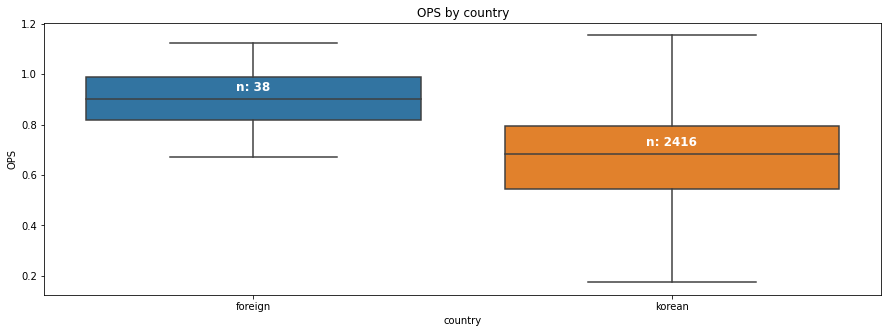

In [112]:
# 외국인과 내국인 선수 성적 비교
plt.figure(figsize=(15,5))
ax = sns.boxplot(x = 'country', y = 'OPS', data = regular_season_df, showfliers=False)

# 국적별 OPS 중앙값 dict
medians = regular_season_df.groupby(['country'])['OPS'].median().to_dict()

# 내외국인 관측치 수 dict
nobs = regular_season_df['country'].value_counts().to_dict()
# 키 값을 'n:값' 형식으로 변환
for key in nobs: nobs[key] = "n: " + str(nobs[key])

# 그래프의 Xticks text 값 얻기
xticks_labels = [item.get_text() for item in ax.get_xticklabels()]

for label in ax.get_xticklabels():
  ax.text(xticks_labels.index(label.get_text()), medians[label.get_text()] + 0.03,
          nobs[label.get_text()], 
          horizontalalignment='center', size='large', color='w', weight='semibold')
ax.set_title('OPS by country')
plt.show()

# 외국인 선수들이 평균적으로 내국인 선수들보다 OPS 성적이 좋은 경향

In [113]:
# 첫 연봉
regular_season_df['starting_salary'].value_counts()
# 달러와 만원 단위가 혼재되어 있다.
# 달러 로 표기된 사람들은 외국인 이라고 생각 할 수 있겠다.

10000만원     177
6000만원      117
3000만원      105
9000만원       97
5000만원       91
8000만원       89
30000만원      74
4000만원       62
12000만원      62
18000만원      54
7000만원       53
11000만원      49
13000만원      48
20000만원      46
25000만원      45
15000만원      41
16000만원      28
14000만원      26
28000만원      20
43000만원      17
45000만원      16
27000만원      15
21000만원      13
23000만원      12
33000만원      10
6500만원       10
100000달러      4
300000달러      3
50000달러       2
17000만원       1
Name: starting_salary, dtype: int64

In [115]:
# 초봉과 성적의 상관관계

# 결측치라면 그대로 0 으로 두고, '만원'이 포함되어 있다면 숫자만 뽑아서 초봉으로 넣어준다.
# 그 외 만원 단위가 아닌 초봉은 결측치로 처리한다.
import re
regular_season_df['starting_salary'] = regular_season_df['starting_salary'].apply(
    lambda x : x if pd.isnull(x)
                 else (int(re.findall('\d+', x)[0]) if '만원' in x else np.nan)
)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


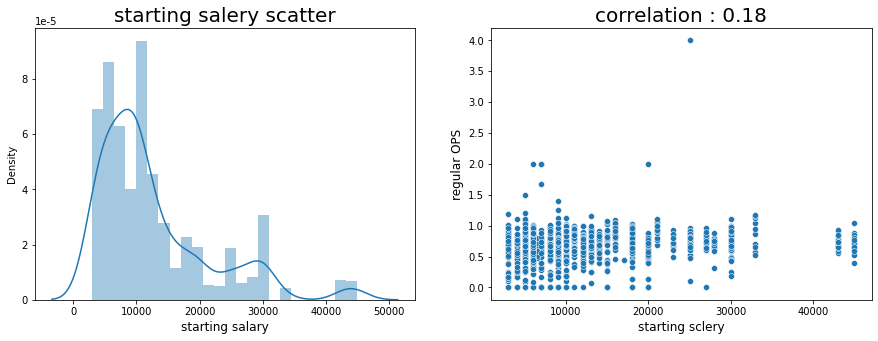

In [118]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
b = sns.distplot(regular_season_df['starting_salary'].loc[regular_season_df['starting_salary'].notnull()], hist=True)
b.set_xlabel('starting salary', fontsize=12)
b.set_title('starting salery scatter', fontsize=20)

plt.subplot(1,2,2)

# 정규시즌과 프리시즌의 상관관계 계산
correlation = regular_season_df['starting_salary'].corr(regular_season_df['OPS'])
b = sns.scatterplot(regular_season_df['starting_salary'], regular_season_df['OPS'])
b.axes.set_title('correlation : ' + str(np.round(correlation,2)), fontsize=20)
b.set_ylabel("regular OPS", fontsize=12)
b.set_xlabel("starting sclery", fontsize=12)
plt.show()

# 해석 : 첫 연봉과 성적은 큰 상관성이 보이지 않는다.

In [ ]:
# 정규시즌 데이터 탐색 결과
# OPS 성적과 높은 연관성을 띠는 변수가 부족하다.
# 외국인 선수 OPS가 다소 높은 경향은 있으나, 외국인 선수는 매해 명단이 달라지고, 그 수도 부족하여 분석에 적용하기엔 한계까 있다.
# 따라서, 정규시즌 데이터를 그대로 활용하는 것이 아니라 조금 다른 차원에서의 접근이 필요하겠다.

In [120]:
# 일별 데이터 분석
day_by_day_df = pd.read_csv('https://raw.githubusercontent.com/youkyung2/dataAnalysis/master/Pred_Koreabaseball/Regular_Season_Batter_Day_by_Day_b4.csv')
display(day_by_day_df.shape, day_by_day_df.head())

(112273, 20)

,batter_id,batter_name,date,opposing_team,avg1,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,HBP,SO,GDP,avg2,year
0,0,가르시아,3.24,NC,0.333,3,1,1,0,0,0,0,0,0,1,0,1,0,0.333,2018
1,0,가르시아,3.25,NC,0.000,4,0,0,0,0,0,0,0,0,0,0,1,0,0.143,2018
2,0,가르시아,3.27,넥센,0.200,5,0,1,0,0,0,0,0,0,0,0,0,0,0.167,2018
3,0,가르시아,3.28,넥센,0.200,5,1,1,0,0,0,1,0,0,0,0,0,0,0.176,2018
4,0,가르시아,3.29,넥센,0.250,4,0,1,0,0,0,3,0,0,0,0,0,1,0.190,2018


In [122]:
day_by_day_df['month'] = day_by_day_df['date'].apply(lambda x : str(x).split('.')[0])

# 각 연도의 월별 평균 누적 타율(avg2) 계산
agg_df = day_by_day_df.groupby(['year','month'])['avg2'].mean().reset_index()
agg_df

,year,month,avg2
0,2001,10,0.356400
1,2001,4,0.205217
2,2001,5,0.297157
3,2001,6,0.306926
4,2001,7,0.293171
...,...,...,...
129,2018,5,0.274083
130,2018,6,0.280630
131,2018,7,0.280817
132,2018,8,0.283923


In [123]:
# pivot_table을 이용해 데이터 변형
agg_df = agg_df.pivot_table(index = ['month'],columns='year', values='avg2')
agg_df

# 3월과 10월에만 결측치 존재.. 연도마다 시즌의 시작일과 종료일이 다르기 때문에 발생한다고 추측됨

year,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
month,,,,,,,,,,,,,,,,,,
10,0.356400,0.269065,0.216583,0.203636,NaN,0.260985,0.249888,0.249638,0.033333,NaN,0.243526,0.246949,0.257841,0.273537,0.274042,0.282547,0.280289,0.277482
3,NaN,NaN,NaN,NaN,NaN,0.261714,0.261714,0.271982,NaN,0.239861,NaN,NaN,0.231236,0.210598,0.214485,0.257857,0.161979,0.238015
4,0.205217,0.319792,0.250296,0.259663,0.235317,0.267106,0.215703,0.261531,0.252546,0.262953,0.247133,0.234199,0.267994,0.259918,0.255175,0.266711,0.259430,0.263953
5,0.297157,0.267990,0.241491,0.237954,0.253527,0.264283,0.237329,0.262535,0.280842,0.272934,0.250877,0.247844,0.268355,0.273899,0.261307,0.275240,0.274374,0.274083
6,0.306926,0.275867,0.252290,0.248800,0.249913,0.264392,0.260600,0.270766,0.278781,0.274791,0.263264,0.254577,0.270533,0.283480,0.268999,0.276307,0.279060,0.280630
7,0.293171,0.266650,0.244230,0.251973,0.256396,0.262464,0.259171,0.264870,0.275054,0.265501,0.264829,0.261513,0.262812,0.275677,0.272685,0.283192,0.284565,0.280817
8,0.303489,0.270481,0.252319,0.249460,0.243570,0.265369,0.270258,0.265173,0.271796,0.271075,0.262048,0.258069,0.268122,0.282025,0.272377,0.283105,0.283283,0.283923
9,0.308636,0.248333,0.243780,0.203953,0.237058,0.258794,0.251022,0.252942,0.264468,0.265312,0.258500,0.251232,0.260571,0.272411,0.271629,0.276513,0.273213,0.277841


year,2011,2012,2013,2014,2015,2016,2017,2018
month,,,,,,,,
4,0.247133,0.234199,0.267994,0.259918,0.255175,0.266711,0.259430,0.263953
5,0.250877,0.247844,0.268355,0.273899,0.261307,0.275240,0.274374,0.274083
6,0.263264,0.254577,0.270533,0.283480,0.268999,0.276307,0.279060,0.280630
7,0.264829,0.261513,0.262812,0.275677,0.272685,0.283192,0.284565,0.280817
8,0.262048,0.258069,0.268122,0.282025,0.272377,0.283105,0.283283,0.283923
9,0.258500,0.251232,0.260571,0.272411,0.271629,0.276513,0.273213,0.277841


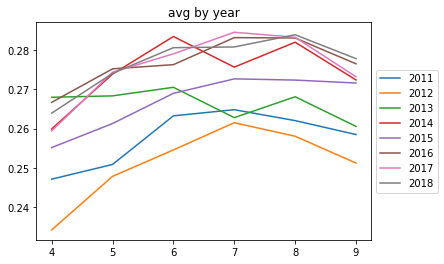

In [125]:
# 연도별 평균타율 시각화 (결측이 존재하는 3월 10월의 성적 제외)
display(agg_df.iloc[2:, 10:])
plt.plot(agg_df.iloc[2:, 10:])
plt.legend(agg_df.iloc[2:, 10:].columns,
           loc='center left', bbox_to_anchor=(1,0.5)) # 범례 그래프 밖에 위치
plt.title('avg by year')
plt.show()

# 시즌시작 직후에는 대부분 성적이 높지않지만, 5~6월에 되어서는 어느 정도 안정화 됨

In [ ]:
# 탐색적 데이터 분석 요약
# 1. 프리시즌 데이터 : 데이터양이 적고, 정규시즌에 있는 선수의 기록이 프리시즌에 존재하지 않는 경우도 있다. => 사용 제외
# 2. 정규시즌 데이터 : OPS가 외국인 여부에 따라 다르게 분포한다.
# 3. 정규시즌 일별 데이터 : 연도별 월별 선수들의 누적 성적변화를 살펴보았을 때, 
#                           OPS 성적의 평균이 월별로 달라지고, 7월 이후에 성적이 수렴된다.

In [ ]:
# 데이터 전처리
# 결측치, 이상치 처리
# 추가변수 생성 ) 규정 타수 정의, 시간 변수

In [126]:
# 결측치 처리 및 데이터 오류 처리

# 결측치 갯수 확인
pd.DataFrame(regular_season_df.isna().sum()).transpose()

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,3B,HR,TB,RBI,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS,height,weight,weight_per_height,pos,hit_way,country
0,0,0,0,0,26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26,24,0,802,0,802,0,1076,26,802,802,802,802,802,0


In [128]:
# 수치형타입의 데이터 결측 처리

# 수치형 타입의 변수 저장
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_cols = regular_season_df.select_dtypes(include=numerics).columns

# 수치형 타입 변수 중 결측치가 하나라도 존재하는 행 출력
# isna().sum(axix = 1) -> 열 기준의 결측치 갯수
# df.loc[] 를 통해 결측치 0개 이상 데이터를 추출
regular_season_df.loc[regular_season_df[num_cols].isna().sum(axis=1) > 0, num_cols].head()

,batter_id,year,avg,G,AB,R,H,2B,3B,HR,TB,RBI,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,starting_salary,OPS,height,weight,weight_per_height
0,0,2018,0.339,50,183,27,62,9,0,8,95,34,5,0,9,8,25,3,0.519000,0.383000,9,NaN,0.902000,177.0,93.0,0.525424
12,138,2005,0.127,39,63,9,8,2,0,0,10,3,1,2,7,4,15,1,0.158730,0.256757,3,NaN,0.415487,NaN,NaN,NaN
13,138,2006,0.139,37,36,6,5,2,0,0,7,0,1,0,8,2,14,0,0.194444,0.326087,4,NaN,0.520531,NaN,NaN,NaN
14,138,2007,0.000,8,4,3,0,0,0,0,0,0,0,0,0,0,2,1,0.000000,0.000000,0,NaN,0.000000,NaN,NaN,NaN
15,138,2008,0.000,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0,NaN,0.000000,NaN,NaN,NaN


In [129]:
num_cols

Index(['batter_id', 'year', 'avg', 'G', 'AB', 'R', 'H', '2B', '3B', 'HR', 'TB',
       'RBI', 'SB', 'CS', 'BB', 'HBP', 'SO', 'GDP', 'SLG', 'OBP', 'E',
       'starting_salary', 'OPS', 'height', 'weight', 'weight_per_height'],
      dtype='object')

In [142]:
# 수치형 타입 변수 중 결측치가 하나라도 존재하는 행 출력
regular_season_df.loc[regular_season_df.select_dtypes(include=numerics).isna().sum(axis=1)>0].head()

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,3B,HR,TB,RBI,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS,height,weight,weight_per_height,pos,hit_way,country
0,0,가르시아,2018,LG,0.339,50,183,27,62,9,0,8,95,34,5,0,9,8,25,3,0.519000,0.383000,9,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.902000,177.0,93.0,0.525424,내야수,우타,foreign
12,138,백승룡,2005,한화,0.127,39,63,9,8,2,0,0,10,3,1,2,7,4,15,1,0.158730,0.256757,3,NaN,1982년 08월 16일,NaN,사직초(부산극동리틀)-사직중-경남상고-경성대-한화-넥센,NaN,0.415487,NaN,NaN,NaN,NaN,NaN,korean
13,138,백승룡,2006,한화,0.139,37,36,6,5,2,0,0,7,0,1,0,8,2,14,0,0.194444,0.326087,4,NaN,1982년 08월 16일,NaN,사직초(부산극동리틀)-사직중-경남상고-경성대-한화-넥센,NaN,0.520531,NaN,NaN,NaN,NaN,NaN,korean
14,138,백승룡,2007,한화,0.000,8,4,3,0,0,0,0,0,0,0,0,0,0,2,1,0.000000,0.000000,0,NaN,1982년 08월 16일,NaN,사직초(부산극동리틀)-사직중-경남상고-경성대-한화-넥센,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,korean
15,138,백승룡,2008,한화,0.000,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0,NaN,1982년 08월 16일,NaN,사직초(부산극동리틀)-사직중-경남상고-경성대-한화-넥센,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,korean


In [ ]:
regular_season_df.info()

In [145]:
# 변수 G : 출전 게임 수
# 뛴 경기가 적어 성적을 산출하지 못하는 경우에는 결측치가 발생한다.
# 결측치를 0으로 대체한다.

regular_season_df[regular_season_df.select_dtypes(include=numerics).columns] = \
regular_season_df[regular_season_df.select_dtypes(include=numerics).columns].fillna(0)

regular_season_df

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,3B,HR,TB,RBI,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS,height,weight,weight_per_height,pos,hit_way,country
0,0,가르시아,2018,LG,0.339,50,183,27,62,9,0,8,95,34,5,0,9,8,25,3,0.519,0.383,9,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),0.0,0.902,177.0,93.0,0.525424,내야수,우타,foreign
1,1,강경학,2011,한화,0.000,2,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0.000,0.000,1,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000.0,0.000,180.0,72.0,0.400000,내야수,좌타,korean
2,1,강경학,2014,한화,0.221,41,86,11,19,2,3,1,30,7,0,0,13,2,28,1,0.349,0.337,6,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000.0,0.686,180.0,72.0,0.400000,내야수,좌타,korean
3,1,강경학,2015,한화,0.257,120,311,50,80,7,4,2,101,27,4,3,40,5,58,3,0.325,0.348,15,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000.0,0.673,180.0,72.0,0.400000,내야수,좌타,korean
4,1,강경학,2016,한화,0.158,46,101,16,16,3,2,1,26,7,0,0,8,2,30,5,0.257,0.232,7,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000.0,0.489,180.0,72.0,0.400000,내야수,좌타,korean
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2449,344,황진수,2014,롯데,0.000,5,5,0,0,0,0,0,0,0,0,0,0,0,1,0,0.000,0.000,0,181cm/82kg,1989년 02월 15일,내야수(우투양타),석천초-대헌중-공주고,4000.0,0.000,181.0,82.0,0.453039,내야수,양타,korean
2450,344,황진수,2015,롯데,0.000,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0,181cm/82kg,1989년 02월 15일,내야수(우투양타),석천초-대헌중-공주고,4000.0,0.000,181.0,82.0,0.453039,내야수,양타,korean
2451,344,황진수,2016,롯데,0.000,11,10,2,0,0,0,0,0,0,0,1,0,0,5,0,0.000,0.000,0,181cm/82kg,1989년 02월 15일,내야수(우투양타),석천초-대헌중-공주고,4000.0,0.000,181.0,82.0,0.453039,내야수,양타,korean
2452,344,황진수,2017,롯데,0.291,60,117,18,34,6,2,1,47,16,4,0,10,3,38,2,0.402,0.359,4,181cm/82kg,1989년 02월 15일,내야수(우투양타),석천초-대헌중-공주고,4000.0,0.761,181.0,82.0,0.453039,내야수,양타,korean


In [148]:
pd.DataFrame(regular_season_df.isna().sum()).transpose()

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,3B,HR,TB,RBI,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS,height,weight,weight_per_height,pos,hit_way,country
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,802,0,802,0,0,0,0,0,0,802,802,0


In [149]:
# 일별 데이터의 결측치를 0으로 대체
day_by_day_df[day_by_day_df.select_dtypes(include=numerics).columns] = \
day_by_day_df[day_by_day_df.select_dtypes(include=numerics).columns].fillna(0)

pd.DataFrame(day_by_day_df.isna().sum()).transpose()

,batter_id,batter_name,date,opposing_team,avg1,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,HBP,SO,GDP,avg2,year,month
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [150]:
day_by_day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112273 entries, 0 to 112272
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   batter_id      112273 non-null  int64  
 1   batter_name    112273 non-null  object 
 2   date           112273 non-null  float64
 3   opposing_team  112273 non-null  object 
 4   avg1           112273 non-null  object 
 5   AB             112273 non-null  int64  
 6   R              112273 non-null  int64  
 7   H              112273 non-null  int64  
 8   2B             112273 non-null  int64  
 9   3B             112273 non-null  int64  
 10  HR             112273 non-null  int64  
 11  RBI            112273 non-null  int64  
 12  SB             112273 non-null  int64  
 13  CS             112273 non-null  int64  
 14  BB             112273 non-null  int64  
 15  HBP            112273 non-null  int64  
 16  SO             112273 non-null  int64  
 17  GDP            112273 non-nul

In [151]:
# 프리시즌 데이터의 결측치를 0 으로 대체

preseason_df[preseason_df.select_dtypes(include=numerics).columns] = \
preseason_df[preseason_df.select_dtypes(include=numerics).columns].fillna(0)

pd.DataFrame(preseason_df.isna().sum()).transpose()

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,3B,HR,TB,RBI,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,214,0


In [152]:
# 수치형이 아닌 변수의 결측치

# 수치형이 아닌 변수 추출
not_num_cols = [x for x in regular_season_df.columns if x not in num_cols]

# 수치형이 아닌 변수 중 결측치가 하나라도 존재하는 행 출력
regular_season_df.loc[regular_season_df[not_num_cols].isna().sum(axis=1) > 0,
                      not_num_cols].head()

# 키와 몸무게, 포지션, 초봉 등에 결측 존재함
# => 추가로 KBO 사이트를 통해 데이터를 내려받거나, 크롤링을 통해 데이터를 보완 할 수 있다.
# 하지만 이 변수들을 추후 분석과정에 이용하지 않을 생각이므로, 따로 결측처리를 하지 않겠다.

,batter_name,team,height/weight,year_born,position,career,pos,hit_way,country
12,백승룡,한화,NaN,1982년 08월 16일,NaN,사직초(부산극동리틀)-사직중-경남상고-경성대-한화-넥센,NaN,NaN,korean
13,백승룡,한화,NaN,1982년 08월 16일,NaN,사직초(부산극동리틀)-사직중-경남상고-경성대-한화-넥센,NaN,NaN,korean
14,백승룡,한화,NaN,1982년 08월 16일,NaN,사직초(부산극동리틀)-사직중-경남상고-경성대-한화-넥센,NaN,NaN,korean
15,백승룡,한화,NaN,1982년 08월 16일,NaN,사직초(부산극동리틀)-사직중-경남상고-경성대-한화-넥센,NaN,NaN,korean
16,백승룡,한화,NaN,1982년 08월 16일,NaN,사직초(부산극동리틀)-사직중-경남상고-경성대-한화-넥센,NaN,NaN,korean


In [154]:
# 잘못된 결측 데이터 삭제
# 실제로 안타를 기록한적이 있으나 장타율이 0인 경우,
# 안타와 볼넷 등을 기록한 적이 있으나 출루율이 0인 경우
# 1999 ~ 2000년의 데이터 이므로, 삭제 처리함

# 삭제할 데이터 추출
drop_idx = regular_season_df.loc[
  # 안타가 0개 이상이면서 장타율이 0인 경우
  ((regular_season_df['H'] > 0 ) & (regular_season_df['SLG'] == 0)) |

  # 안타가 0개 이상 혹은 볼넷이 0개 이상 혹은 몸에 맞은 볼이 0개 이상이면서 출루율이 0인경우
  (((regular_season_df['H'] > 0 ) | 
    (regular_season_df['BB'] > 0 ) |
    (regular_season_df['HBP'] > 0 )) &
   (regular_season_df['OBP'] == 0))
].index

drop_idx

# 삭제 처리
regular_season_df = regular_season_df.drop(drop_idx).reset_index(drop=True)

Int64Index([478, 746, 1457, 1674, 1675, 1934, 1935], dtype='int64')

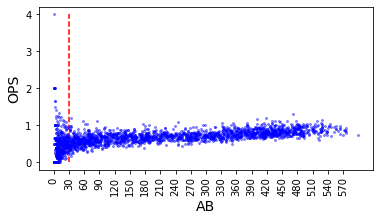

In [160]:
# 규정 타수 정의
# 타수가 작은 선수는 출루율이나 장타율이 매우 높거나 낮게 형성 될 확률이 크다.

# 타수에 다른 OPS 수치 시각화
plt.figure(figsize=(6,3))
plt.plot('AB', 'OPS', data=regular_season_df, linestyle='none', marker='o',
         markersize=2, color='blue', alpha=0.4)
plt.xlabel('AB', fontsize=14)
plt.ylabel('OPS', fontsize=14)
plt.xticks(list(range(min(regular_season_df['AB']), max(regular_season_df['AB']), 30)), rotation=90)
plt.vlines(30, ymin=min(regular_season_df['OPS']), ymax=max(regular_season_df['OPS']),
           linestyles='dashed', colors='r')
plt.show()

# 규정타수가 적은 특정한 구간에서 OPS가 매우 넓게 분포한다.
# 특히 타수가 30 미만인 경우에는 OPS 분포가 매우 넓다.
# 따라서, 30을 규정타수라고 정의하고 분석을 진행하겠다 !!

In [161]:
# 규정 타수를 30으로 정의하는 것의 타당성을 확인하기 위해
# 이상치로 판단되는 OPS를 기록한 경우를 다시한번 탐색하자.
# OPS 데이터의 상위 25%, 75% 수치와 그 범위를 이용하여 이상치를 탐색하겠다.

# 이상치 탐색
Q1 = regular_season_df['OPS'].quantile(0.25)
Q3 = regular_season_df['OPS'].quantile(0.75)
IQR = Q3 - Q1

# 실제 OPS 이상치 탐색
regular_season_df.loc[(regular_season_df['OPS'] < (Q1 - 1.5 * IQR)) |
                      (regular_season_df['OPS'] > (Q3 + 1.5 * IQR))].sort_values(
                  by=['AB'], axis = 0, ascending=False)[['batter_name','AB','year','OPS']].head(10)

# 확인결과, 2015년 테임즈, 2014년 강정호 처럼 성적이 매우 뛰어났던 특정 경우를 제외한다면
# 30 타수 이하의 선수에게서 대부분 이상치가 나왔다.
# 따라서 규정 타수를 30으로 정의하는 것이 타당하다.

,batter_name,AB,year,OPS
2329,테임즈,472,2015,1.293656
97,강정호,418,2014,1.200156
1318,유재신,33,2018,1.192000
416,김원섭,25,2005,0.116923
1543,이여상,22,2013,0.090909
681,문규현,18,2007,0.109000
578,김회성,17,2010,0.105000
1902,정병곤,15,2018,0.130000
1874,정경운,15,2018,0.130000
2384,현재윤,15,2014,1.229167


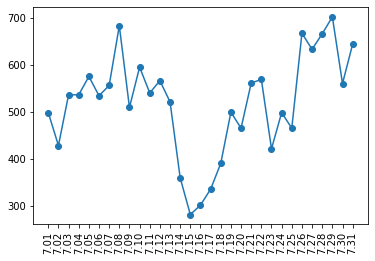

In [162]:
# 상반기 성적을 정의하기 위해 며칠까지의 기록을 상반기로 정의할 것인지 결정한다.
# 야구는 7월 중순 쯤에 일주일 정도 휴식기를 갖기 때문에,
# 이 휴식 전을 상반기, 이 휴식 이후를 하반기로 본다.
# 휴식 기간에는 야구 경기 수가 다른 날짜에 비해 적을 것이다.

major_ticks = list(np.round(np.linspace(7.01, 7.31, 31), 2))

july = (day_by_day_df['date'] >= 7) & (day_by_day_df['date'] < 8) # 7월만 불러오는 index
plt.plot(major_ticks,
         day_by_day_df['date'].loc[july].value_counts().sort_index(), marker='o')
plt.xticks(major_ticks, rotation=90)
plt.show()

In [177]:
day_by_day_df[(day_by_day_df['date'] >= 7) & (day_by_day_df['date'] < 8)]['date'].value_counts().sort_values(ascending=True)
# 7.18 을 기준으로 상/하반기로 나누자.

7.15    282
7.16    302
7.17    336
7.14    360
7.18    391
7.23    422
7.02    429
7.25    466
7.20    466
7.24    499
7.01    499
7.19    500
7.09    510
7.13    522
7.06    535
7.04    537
7.03    537
7.11    541
7.07    557
7.30    561
7.21    562
7.12    567
7.22    570
7.05    576
7.10    596
7.27    634
7.31    645
7.28    667
7.26    668
7.08    684
7.29    703
Name: date, dtype: int64